 # AI & ML Hackathon

### 1. Import Libraries and Load Data

In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle


[notice] A new release of pip available: 22.2.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


Loading datasets using local device and showing dataset info

In [2]:
file_path = 'electricity_bill_dataset.csv'
df = pd.read_csv(file_path)
print("Dataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB


In [3]:
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill  
0         8.4          

## 2. Data Preprocessing & Feature Engineering

Check for missing values

In [4]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64


Deleting MotoPump Column as it is fully zero and will not affect the result

In [5]:
df.drop(columns=['MotorPump','TariffRate','MonthlyHours'],inplace=True)

Finding unique values in city and company column

In [6]:
print("Unique values in city:", df['City'].nunique())
print("Unique values in company:", df['Company'].nunique())
original_cities = df['City'].unique().tolist()
original_companies = df['Company'].unique().tolist()

print("\nUnique categories in city:")
print(df['City'].unique())

print("\nUnique categories in company:")
print(df['Company'].unique())


Unique values in city: 16
Unique values in company: 32

Unique categories in city:
['Hyderabad' 'Vadodara' 'Shimla' 'Mumbai' 'Ratnagiri' 'New Delhi' 'Dahej'
 'Ahmedabad' 'Noida' 'Nagpur' 'Chennai' 'Faridabad' 'Kolkata' 'Pune'
 'Gurgaon' 'Navi Mumbai']

Unique categories in company:
['Tata Power Company Ltd.' 'NHPC' 'Jyoti Structure' 'Power Grid Corp'
 'Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)' 'Adani Power Ltd.'
 'Kalpataru Power' 'Orient Green' 'Sterlite Power Transmission Ltd'
 'Neueon Towers / Sujana Towers Ltd.' 'KEC International'
 'Indowind Energy' 'Unitech Power Transmission Ltd.'
 'Bonfiglioli Transmission Pvt. Ltd.' 'SJVN Ltd.'
 'Maha Transco – Maharashtra State Electricity Transmission Co, Ltd.'
 'L&T Transmission & Distribution' 'Guj Ind Power' 'Torrent Power Ltd.'
 'Reliance Energy' 'GE T&D India Limited' 'NTPC Pvt. Ltd.'
 'Optibelt Power Transmission India Private Limited' 'CESC'
 'Ringfeder Power Transmission India Pvt. Ltd.' 'Reliance Power'
 'JSW Energy Ltd.' 'Sunil Hi

One-Hot Encode categorical variables 'City' and 'Company'.This is superior to Label Encoding as it doesn't create a false ordinal relationship.

In [7]:
df_processed = pd.get_dummies(df, columns=['City', 'Company'], drop_first=True)

In [8]:
print("\nShape of processed data:", df_processed.shape)
print("Columns of processed data:", df_processed.columns)


Shape of processed data: (45345, 53)
Columns of processed data: Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'Month', 'ElectricityBill', 'City_Chennai', 'City_Dahej',
       'City_Faridabad', 'City_Gurgaon', 'City_Hyderabad', 'City_Kolkata',
       'City_Mumbai', 'City_Nagpur', 'City_Navi Mumbai', 'City_New Delhi',
       'City_Noida', 'City_Pune', 'City_Ratnagiri', 'City_Shimla',
       'City_Vadodara', 'Company_Bonfiglioli Transmission Pvt. Ltd.',
       'Company_CESC', 'Company_GE T&D India Limited', 'Company_Guj Ind Power',
       'Company_Indowind Energy', 'Company_JSW Energy Ltd.',
       'Company_Jaiprakash Power', 'Company_Jyoti Structure',
       'Company_KEC International', 'Company_Kalpataru Power',
       'Company_L&T Transmission & Distribution',
       'Company_Maha Transco – Maharashtra State Electricity Transmission Co, Ltd.',
       'Company_NHPC', 'Company_NLC India', 'Company_NTPC Pvt. Ltd.',
       'Company_Neueon Towers / Sujana 

## 3. Exploratory Data Analysis (EDA) & Visualization

Distribution of the target variable: ElectricityBill

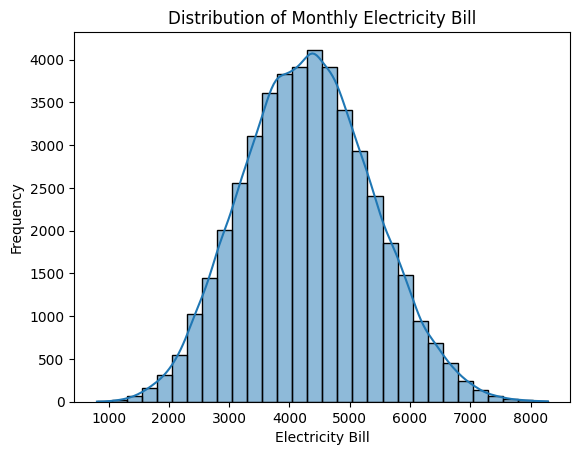

In [9]:
sns.histplot(df_processed['ElectricityBill'], kde=True, bins=30)
plt.title('Distribution of Monthly Electricity Bill')
plt.xlabel('Electricity Bill')
plt.ylabel('Frequency')
plt.show()

This helps us see which features are most correlated with the electricity bill.

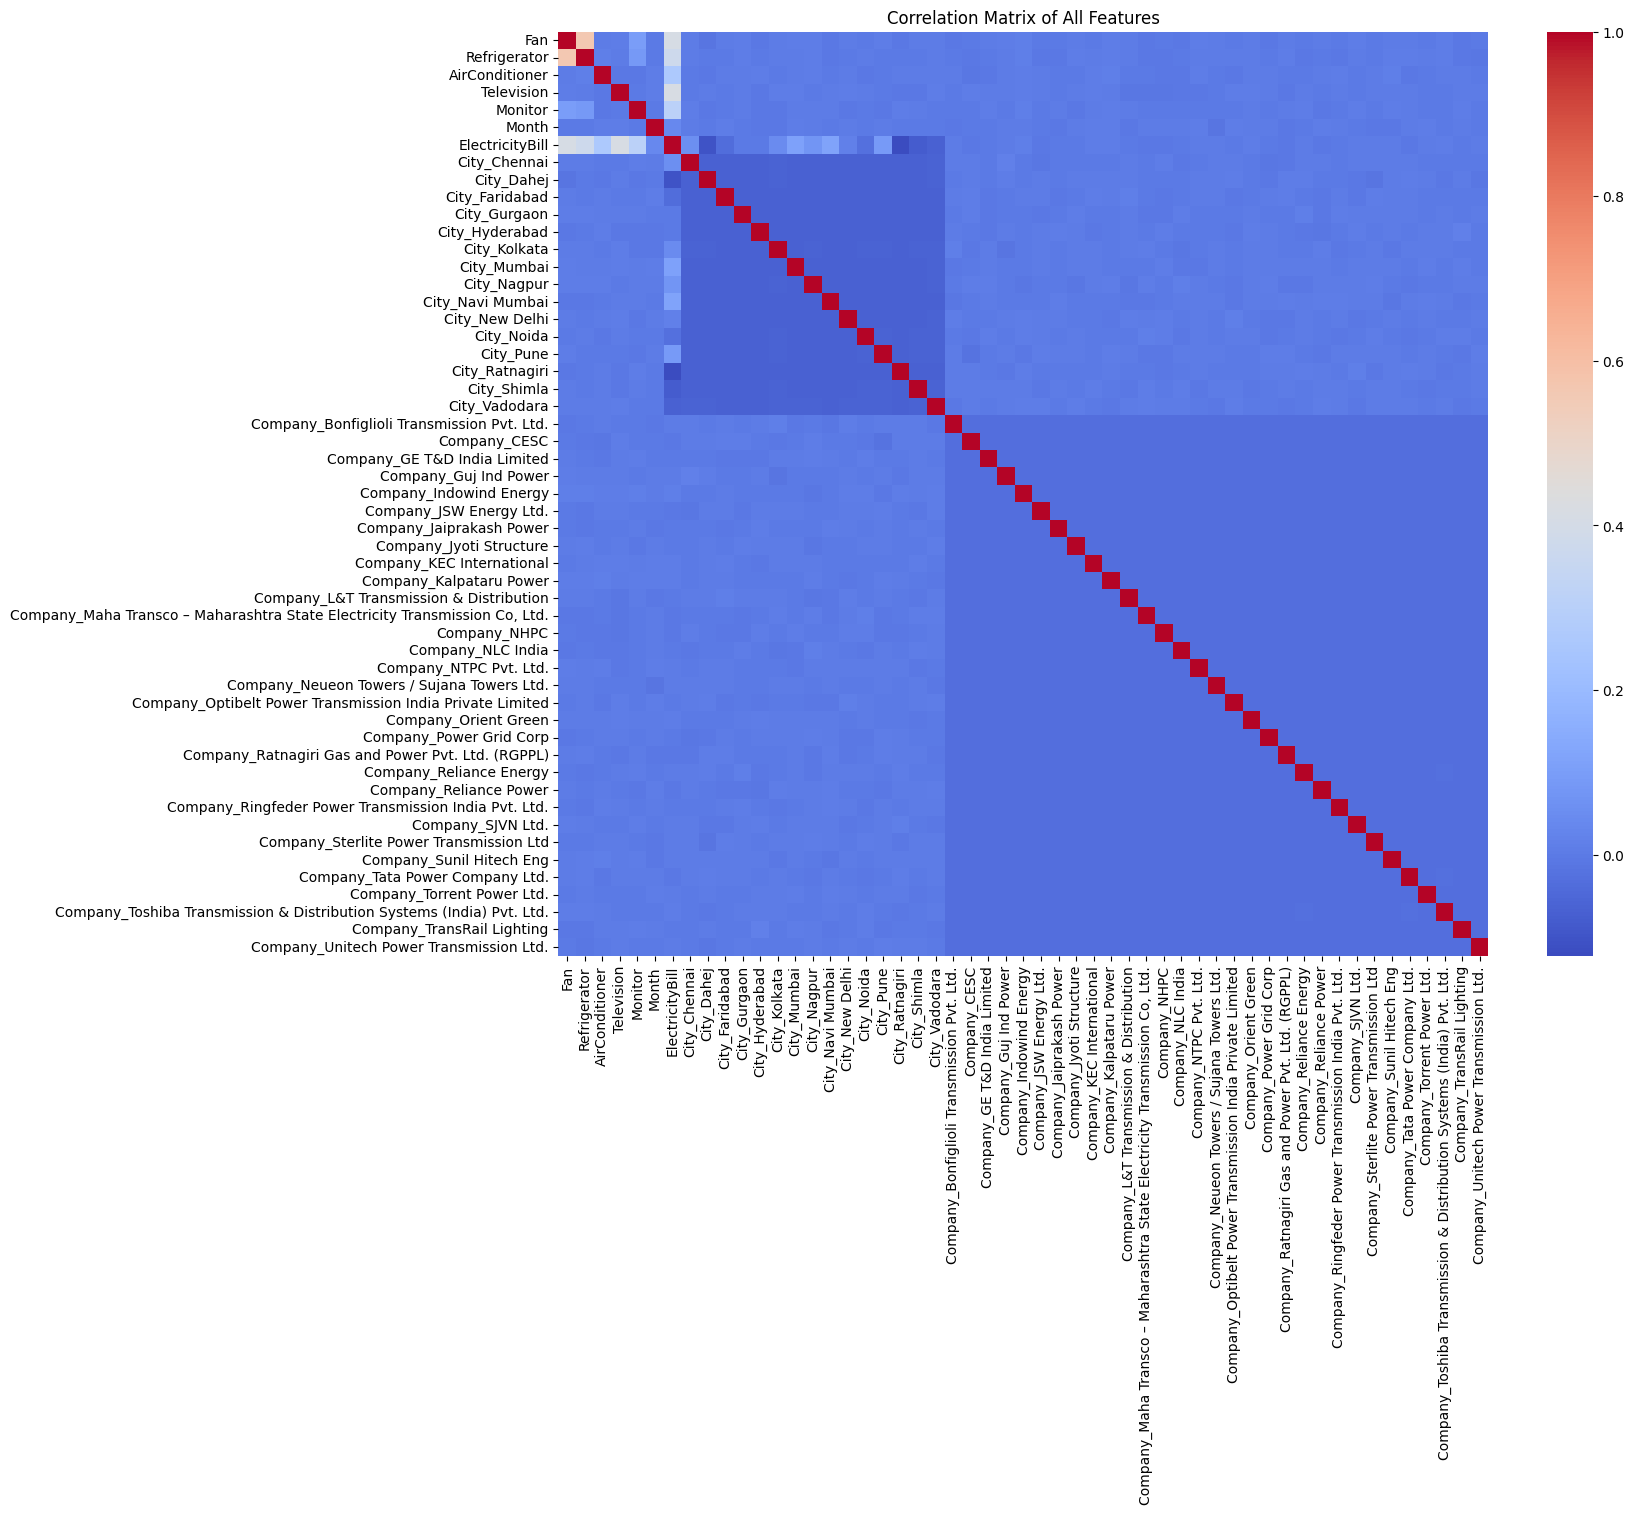

In [10]:
plt.figure(figsize=(15, 12))
correlation_matrix = df_processed.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm') # Annot=False for readability on many features
plt.title('Correlation Matrix of All Features')
plt.show()

In [11]:
print("\nTop 10 features correlated with ElectricityBill:")
print(correlation_matrix['ElectricityBill'].drop(['ElectricityBill']).sort_values(ascending=False).head(10))


Top 10 features correlated with ElectricityBill:
Television          0.412651
Fan                 0.410682
Refrigerator        0.376816
Monitor             0.309986
AirConditioner      0.261845
City_Navi Mumbai    0.114952
City_Mumbai         0.110545
City_Pune           0.090103
City_Nagpur         0.072291
City_Chennai        0.056265
Name: ElectricityBill, dtype: float64


Scatter plot of the most important features vs. Electricity Bill

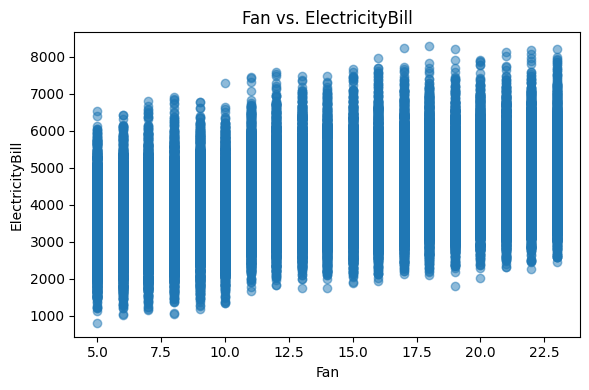

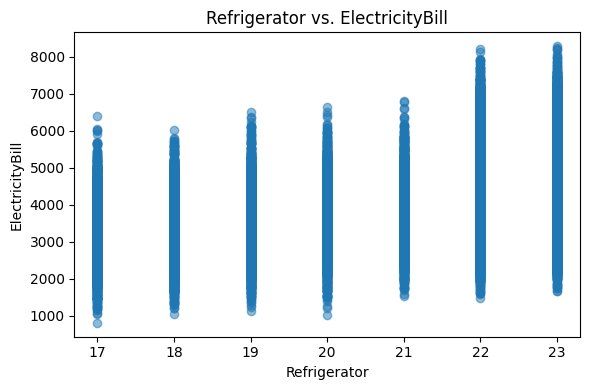

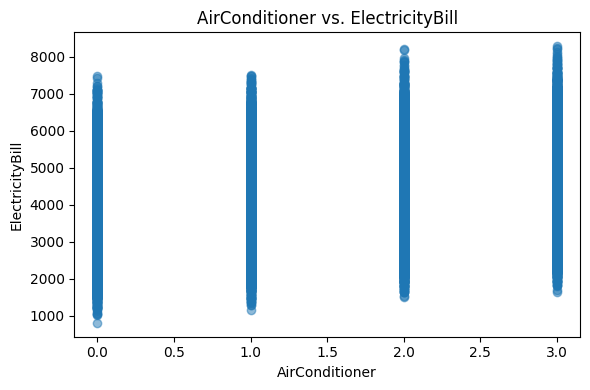

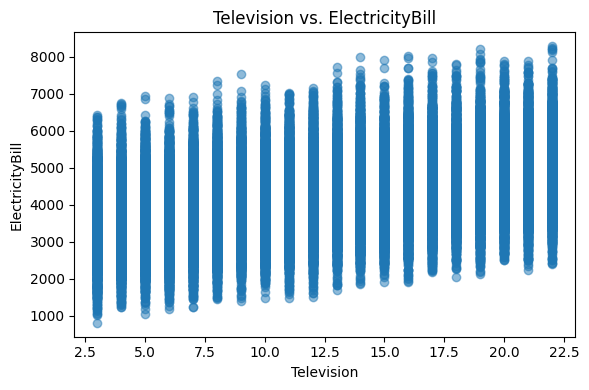

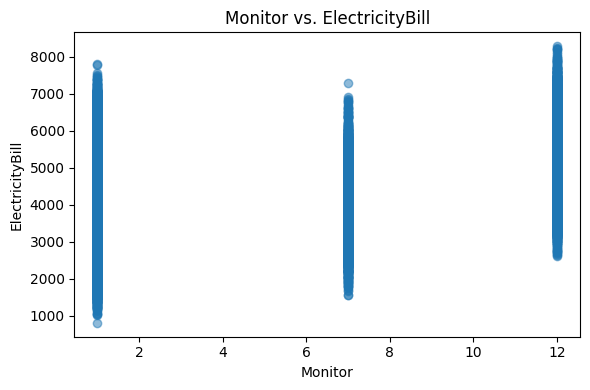

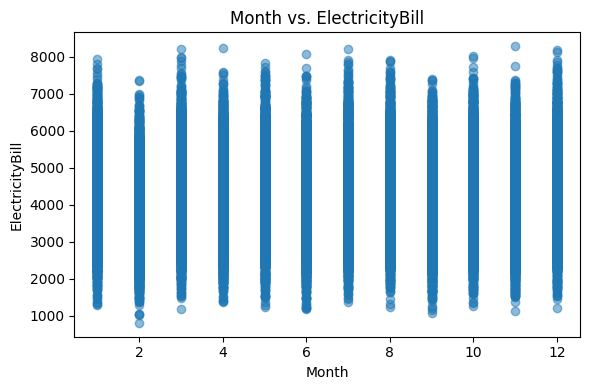

In [12]:
for col in df.columns:
    if col != 'ElectricityBill':
        if df[col].dtype != 'object':
            plt.figure(figsize=(6, 4))
            plt.scatter(df[col], df['ElectricityBill'], alpha=0.5)
            plt.xlabel(col)
            plt.ylabel('ElectricityBill')
            plt.title(f'{col} vs. ElectricityBill')
            plt.tight_layout()
            plt.show()

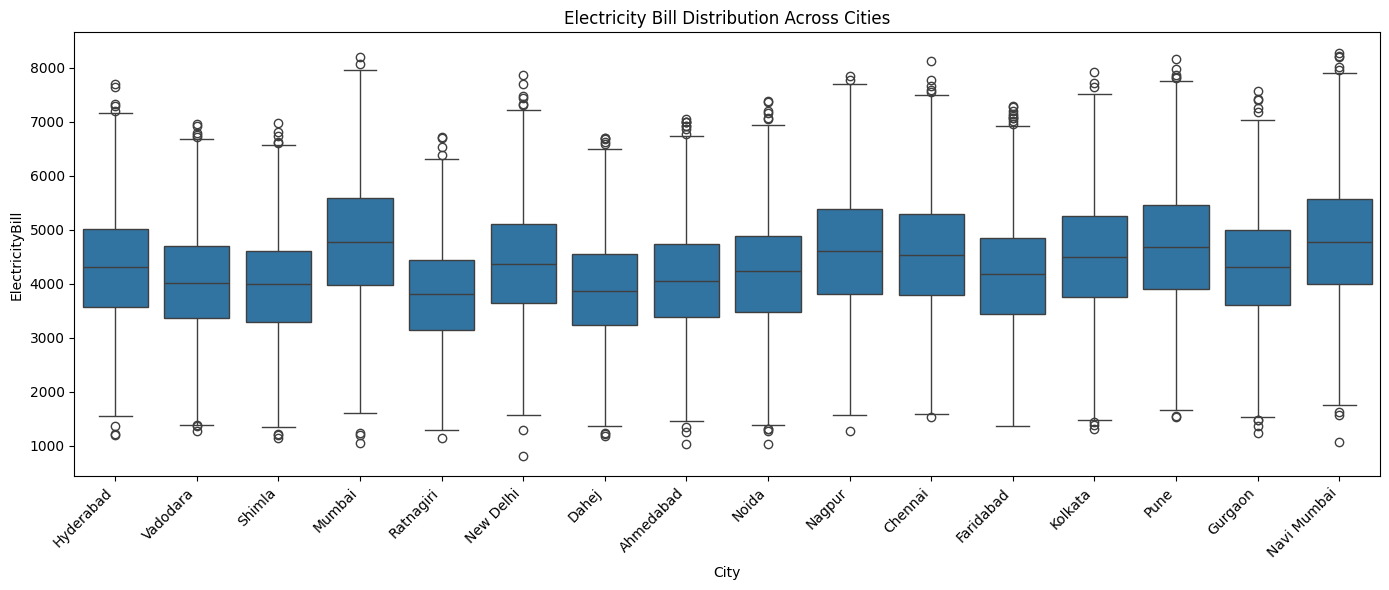

In [13]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='City', y='ElectricityBill', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Electricity Bill Distribution Across Cities')
plt.tight_layout()
plt.show()

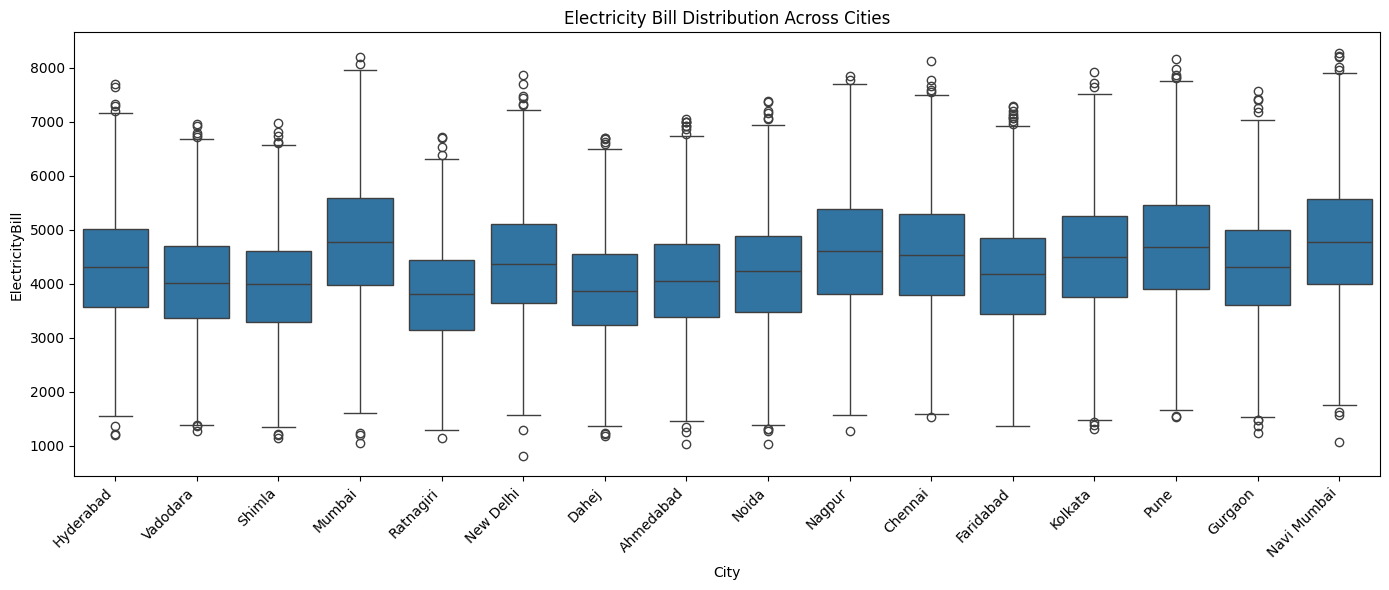

In [14]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='City', y='ElectricityBill', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Electricity Bill Distribution Across Cities')
plt.tight_layout()
plt.show()

## 4. Model Building and Training

In [15]:
X = df_processed.drop('ElectricityBill', axis=1)
y = df_processed['ElectricityBill']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
model_columns = X.columns.tolist()
with open('model_columns_without.pkl', 'wb') as f:
    pickle.dump(model_columns, f)

Training set shape: (36276, 52)
Testing set shape: (9069, 52)


In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
with open('scaler_without.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## 5. Final Model Evaluation

Make prediction on Test Set

In [17]:
model=LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Dumping :

In [18]:
y_pred = model.predict(X_test_scaled)

Calculate Evaluation Metrics

In [19]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [20]:
print("\n--- Linear Regression Model Performance on Test Set ---")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²) Score: {r2:.4f}")


--- Linear Regression Model Performance on Test Set ---
Root Mean Squared Error (RMSE): 693.6489
R-squared (R²) Score: 0.5777


In [21]:
app_data = {
    "cities": original_cities,
    "companies": original_companies
}
with open('app_data.pkl', 'wb') as f:
    pickle.dump(app_data, f)

In [22]:
with open('linear_regression_without.pkl', 'wb') as f:
    pickle.dump(model, f)